<a href="https://colab.research.google.com/github/Evandro72/wordcloudUsers/blob/main/WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 1.2 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=db52d55e1b8881ec2eb75a70a8cdebc129620b50b3003bc00a16f2f47edc54db
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [4]:
pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=ed2ad10e7553c7022396d7f0f10173b35e5be39d3fbc456514eec9846dbbcd1d
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [5]:
from PIL import Image
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from langdetect import detect
import random
import pycountry

In [6]:
# Creating Language Dict
Languages = {}

for lang in pycountry.languages:
    try:
        Languages[lang.alpha_2] = lang.name
    except:
        pass

In [7]:
# Tweets were based on these Languages 
Unique_Lang_Code = ['it', 'da', 'zh-cn', 'en', 'lt', 'fr', 'sl', 'hu', 'sq', 'sv', 'uk', 'sk', 'ca', 'lv', 'af', 'th', 'no', 'fi', 'vi', 'de', 'cy', 'ja', 'nl', 'es', 'cs', 'ro', 'tl', 'pl', 'id', 'fa', 'ru', 'et', 'sw', 'tr', 'pt', 'el', 'so', 'hr']

In [8]:
# Reading CSV File
df = pd.read_csv('Tweets.csv')

In [9]:
# Filtering Tweets on Language

Text_Dict = {}

for index, tweet in enumerate(df['Cleaned_Tweet']):
    try:
        languade_2code = detect(tweet)

        if Languages[languade_2code] in Text_Dict.keys():
            Text_Dict[Languages[languade_2code]].append(df.loc[index, 'Cleaned_Tweet'])
        else:
            Text_Dict[Languages[languade_2code]] = []
            Text_Dict[Languages[languade_2code]].append(df.loc[index, 'Cleaned_Tweet'])

    except:
        if 'Unknown' in Text_Dict.keys():
            Text_Dict['Unknown'] = []
            Text_Dict['Unknown'].append(df.loc[index, 'Cleaned_Tweet'])


In [10]:
# Sorting Dictionary 
import operator

def sort_by_values_len(dict):
    dict_len= {key: len(value) for key, value in dict.items()}
    
    sorted_key_list = sorted(dict_len.items(), key=operator.itemgetter(1), reverse=True)
    sorted_dict = [{item[0]: dict[item [0]]} for item in sorted_key_list]
    return sorted_dict

Sorted_Text_Dict = sort_by_values_len(Text_Dict)[0]

In [16]:
# Word Cloud Function
def CreateWordCloud(Key, Text, WCBGColor, maxword):
    # create numpy array for wordcloud mask image
    mask = np.array(Image.open('cloud.png'))

    # create wordcloud object
    wc = WordCloud(background_color=WCBGColor, max_words=int(maxword), mask=mask)

    # generate wordcloud
    wc.generate(Text)

    wc.to_image().save(Key + '.png')

In [ ]:
# Creating Word Cloud for Each Language in Output Folder
for key in list(Text_Dict.keys())[:10]:    
    text = ' '.join(Text_Dict[key])
    CreateWordCloud(key, text, 'white', 200)

In [18]:
# User Word Cloud
User_List = df['User'].tolist()
CreateWordCloud('User', ' '.join(User_List), 'white', 200)

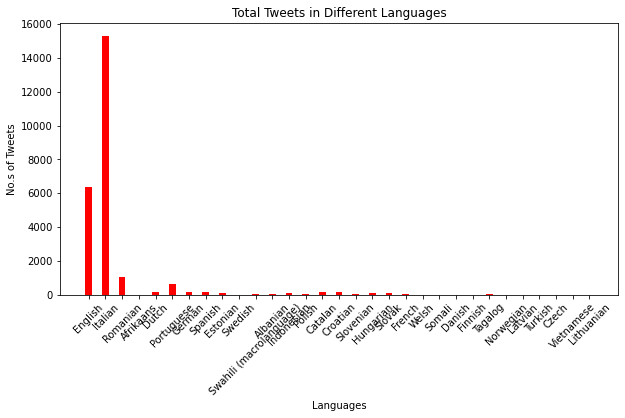

In [ ]:
# Creating Bar Chart

import numpy as np
import matplotlib.pyplot as plt
Lang = list(Text_Dict.keys())
values = [len(item) for item in Text_Dict.values()]
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Lang, values, color ='red', width = 0.4)

plt.xticks(rotation=45)
plt.xlabel("Languages")
plt.ylabel("No.s of Tweets")
plt.title("Total Tweets in Different Languages")
plt.show()